topic: Recommender System for Movies/Books/Music

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. data loading & basic inspection

In [39]:
movieDf = pd.read_csv("movies.csv")
linkDf = pd.read_csv("links.csv")
ratingDf = pd.read_csv("ratings.csv")
tagDf = pd.read_csv("tags.csv")

about data files:

1. Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.
2. All ratings are contained in the file ratings.csv. Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).
3. All tags are contained in the file tags.csv. Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.
4. Identifiers that can be used to link to other sources of movie data are contained in the file links.csv. 
    
    movieId is an identifier for movies used by https://movielens.org. E.g., the movie Toy Story has the link https://movielens.org/movies/1.
    
    imdbId is an identifier for movies used by http://www.imdb.com. E.g., the movie Toy Story has the link http://www.imdb.com/title/tt0114709/.

    tmdbId is an identifier for movies used by https://www.themoviedb.org. E.g., the movie Toy Story has the link https://www.themoviedb.org/movie/862.

5. Movie information is contained in the file movies.csv. Movie titles are entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles Genres are a pipe-separated list, and are selected from the following:
    - Action
    - Adventure
    - Animation
    - Children's
    - Comedy
    - Crime
    - Documentary
    - Drama
    - Fantasy
    - Film-Noir
    - Horror
    - Musical
    - Mystery
    - Romance
    - Sci-Fi
    - Thriller
    - War
    - Western
    - (no genres listed)


In [40]:
movieDf.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [41]:
linkDf.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [42]:
ratingDf.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [43]:
tagDf.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [44]:
print("Movies df's shape: ", movieDf.shape)
print("Links df's shape: ", linkDf.shape)
print("Ratings df's shape: ", ratingDf.shape)
print("Tags df's shape: ", tagDf.shape)

Movies df's shape:  (9742, 3)
Links df's shape:  (9742, 3)
Ratings df's shape:  (100836, 4)
Tags df's shape:  (3683, 4)


In [45]:
print("Movies df:")
print(movieDf.info(), "\n")
print("Links df:")
print(linkDf.info())

Movies df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None 

Links df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None


In [46]:
print("Ratings df:")
print(ratingDf.info(), "\n")
print("Tags df:")
print(tagDf.info())

Ratings df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None 

Tags df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None


In [47]:
print("Sum of missing values in Movies df: ", movieDf.isna().sum(), "\n")
print("Sum of missing values in Links df: ", linkDf.isna().sum(), "\n")
print("Sum of missing values in Ratings df: ", ratingDf.isna().sum(), "\n")
print("Sum of missing values in Tags df: ", tagDf.isna().sum())

Sum of missing values in Movies df:  movieId    0
title      0
genres     0
dtype: int64 

Sum of missing values in Links df:  movieId    0
imdbId     0
tmdbId     8
dtype: int64 

Sum of missing values in Ratings df:  userId       0
movieId      0
rating       0
timestamp    0
dtype: int64 

Sum of missing values in Tags df:  userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


### 2. Data cleaning and preprocessing.

here we check missing values, convert genres into a usable format, and prepare the user–item matrix for the recommender model.


In [48]:
linkDf.dropna(inplace=True)

In [49]:
print("Sum of missing values in Links df: ", linkDf.isna().sum(), "\n")

Sum of missing values in Links df:  movieId    0
imdbId     0
tmdbId     0
dtype: int64 



Only a small number of missing values (8 rows) were detected in the links dataset. That's why these rows were removed.

In [50]:
ratingDf['timestamp'] = pd.to_datetime(ratingDf['timestamp'], unit='s')
ratingDf.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [51]:
tagDf['timestamp'] = pd.to_datetime(tagDf['timestamp'], unit='s')
tagDf.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,2015-10-24 19:29:54
1,2,60756,Highly quotable,2015-10-24 19:29:56
2,2,60756,will ferrell,2015-10-24 19:29:52
3,2,89774,Boxing story,2015-10-24 19:33:27
4,2,89774,MMA,2015-10-24 19:33:20


The timestamp column was converted to datetime format for easier analysis and potential time-based splitting.

In [52]:
ratingDf.duplicated().sum()

np.int64(0)

In [53]:
tagDf.duplicated().sum()

np.int64(0)

In [54]:
movieDf = movieDf[movieDf['genres'] != '(no genres listed)']

Removed movies without genre information to ensure better item-item similarity modeling.

In [55]:
genre_dummies = movieDf['genres'].str.get_dummies(sep='|')
movieDf = pd.concat([movieDf, genre_dummies], axis=1)
movieDf.head()


,movieId,title,genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


splitting genres to use this column easily

In [56]:
user_item_matrix = ratingDf.pivot_table(
    index='movieId',
    columns='userId',
    values='rating'
)

In [57]:
user_item_matrix.shape

(9724, 610)

In [58]:
user_item_matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
user_item_matrix_filled = user_item_matrix.fillna(0)
user_item_matrix_filled.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


created user-item matrix for item-item similarity

### 3. Exploratory data analysis (EDA) with visualizations.

movieDf;
linkDf;
ratingDf;
tagDf;
user_item_matrix_filled / user_item_matrix

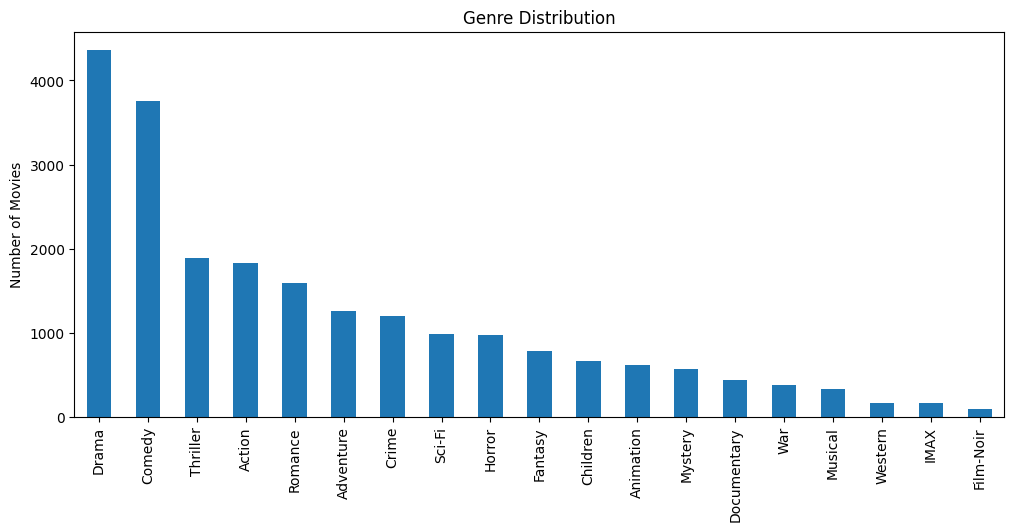

In [60]:
plt.figure(figsize=(12, 5))
genre_dummies.sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Genre Distribution")
plt.ylabel("Number of Movies")
plt.show()

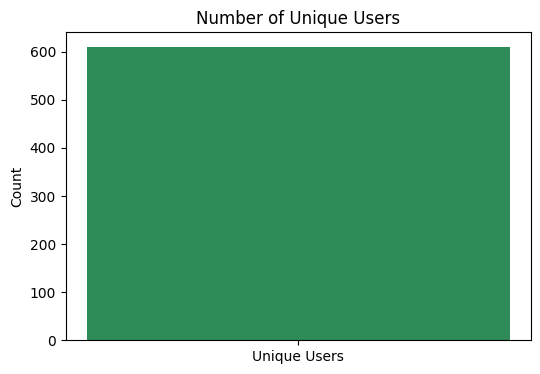

In [62]:
plt.figure(figsize=(6, 4))
plt.bar(['Unique Users'], [ratingDf['userId'].nunique()], color="seagreen")
plt.title("Number of Unique Users")
plt.ylabel("Count")
plt.show()

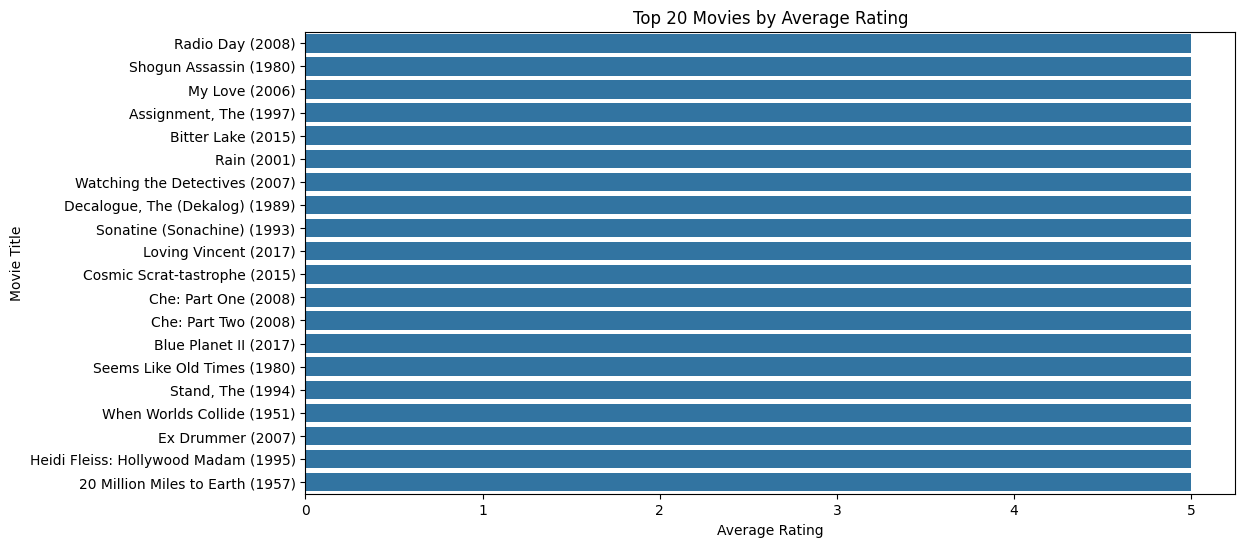

In [63]:
# Average rating per movie
avg_rating_per_movie = ratingDf.groupby('movieId')['rating'].mean()

# Convert Series -> DataFrame for merging
avg_rating_df = avg_rating_per_movie.reset_index()
avg_rating_df.columns = ['movieId', 'avg_rating']

# Merge with movie titles
merged = avg_rating_df.merge(movieDf[['movieId', 'title']], on='movieId')

# Top 20 by average rating
top20 = merged.sort_values('avg_rating', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top20, x='avg_rating', y='title')
plt.title("Top 20 Movies by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()

### 4. Model training and evaluation.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

Cosine similarity measures how similar two movies are based on the pattern of user preferences, regardless of the total number of ratings.

creating database to work with in model training and testing:

In [65]:
ratings = ratingDf[["userId", "movieId", "rating"]].copy()
ratings["liked"] = ratings["rating"] >= 4.0
ratings.head()

,userId,movieId,rating,liked
0,1,1,4.0,True
1,1,3,4.0,True
2,1,6,4.0,True
3,1,47,5.0,True
4,1,50,5.0,True


splitting data into train & test. 20% of data will be in a test part:

In [66]:
train, test = train_test_split(ratings, test_size=0.2, random_state=42)

##### first model: item-item similarity recommender

creating user-item matrix for train:

In [67]:
train_matrix = train.pivot_table(
    index="userId",
    columns="movieId",
    values="liked",
    fill_value=0
)

train_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,191005,193565,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


item-item similarity:

In [68]:
item_vectors = train_matrix.T  

item_similarity = pd.DataFrame(
    cosine_similarity(item_vectors),
    index=item_vectors.index,
    columns=item_vectors.index
)

print(item_similarity)

movieId    1         2         3       4         5         6         7       \
movieId                                                                       
1        1.000000  0.214746  0.132314     0.0  0.138592  0.185411  0.071007   
2        0.214746  1.000000  0.090167     0.0  0.059028  0.105292  0.201619   
3        0.132314  0.090167  1.000000     0.0  0.109109  0.116775  0.149071   
4        0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   
5        0.138592  0.059028  0.109109     0.0  1.000000  0.050965  0.195180   
...           ...       ...       ...     ...       ...       ...       ...   
193581   0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   
193583   0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   
193585   0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   
193587   0.000000  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   
193609   0.000000  0.000000  0.000000     0.0  0.000

function to generate recommendations:

In [ ]:
def recommend_items(user_id, top_k=10):
    user_vector = train_matrix.loc[user_id]
    rated_items = user_vector[user_vector > 0].index
    
    scores = item_similarity.loc[rated_items].sum(axis=0)
    scores = scores.drop(rated_items, errors="ignore")
    
    return scores.sort_values(ascending=False).head(top_k).index.tolist()

here is function which evaluates the quality of the recommender system using Precision@K and Recall@K:

In [70]:
def precision_recall_at_k(k=10):
    precisions = []
    recalls = []

    test_liked = test[test['liked'] == True]

    for user_id in test_liked['userId'].unique():
        true_items = set(test_liked[test_liked['userId'] == user_id]['movieId'])

        if len(true_items) == 0:
            continue

        recs = recommend_items(user_id, top_k=k)
        recs_set = set(recs)

        tp = len(recs_set & true_items)

        precision = tp / k
        recall = tp / len(true_items)

        precisions.append(precision)
        recalls.append(recall)

    return sum(precisions) / len(precisions), sum(recalls) / len(recalls)


p, r = precision_recall_at_k(k=10)
print("Precision@10:", round(p, 4))
print("Recall@10:", round(r, 4))

Precision@10: 0.1593
Recall@10: 0.1634


Precision@K measures how many of the recommended items are actually relevant.

Recall@K measures how many of the relevant items are successfully recommended.

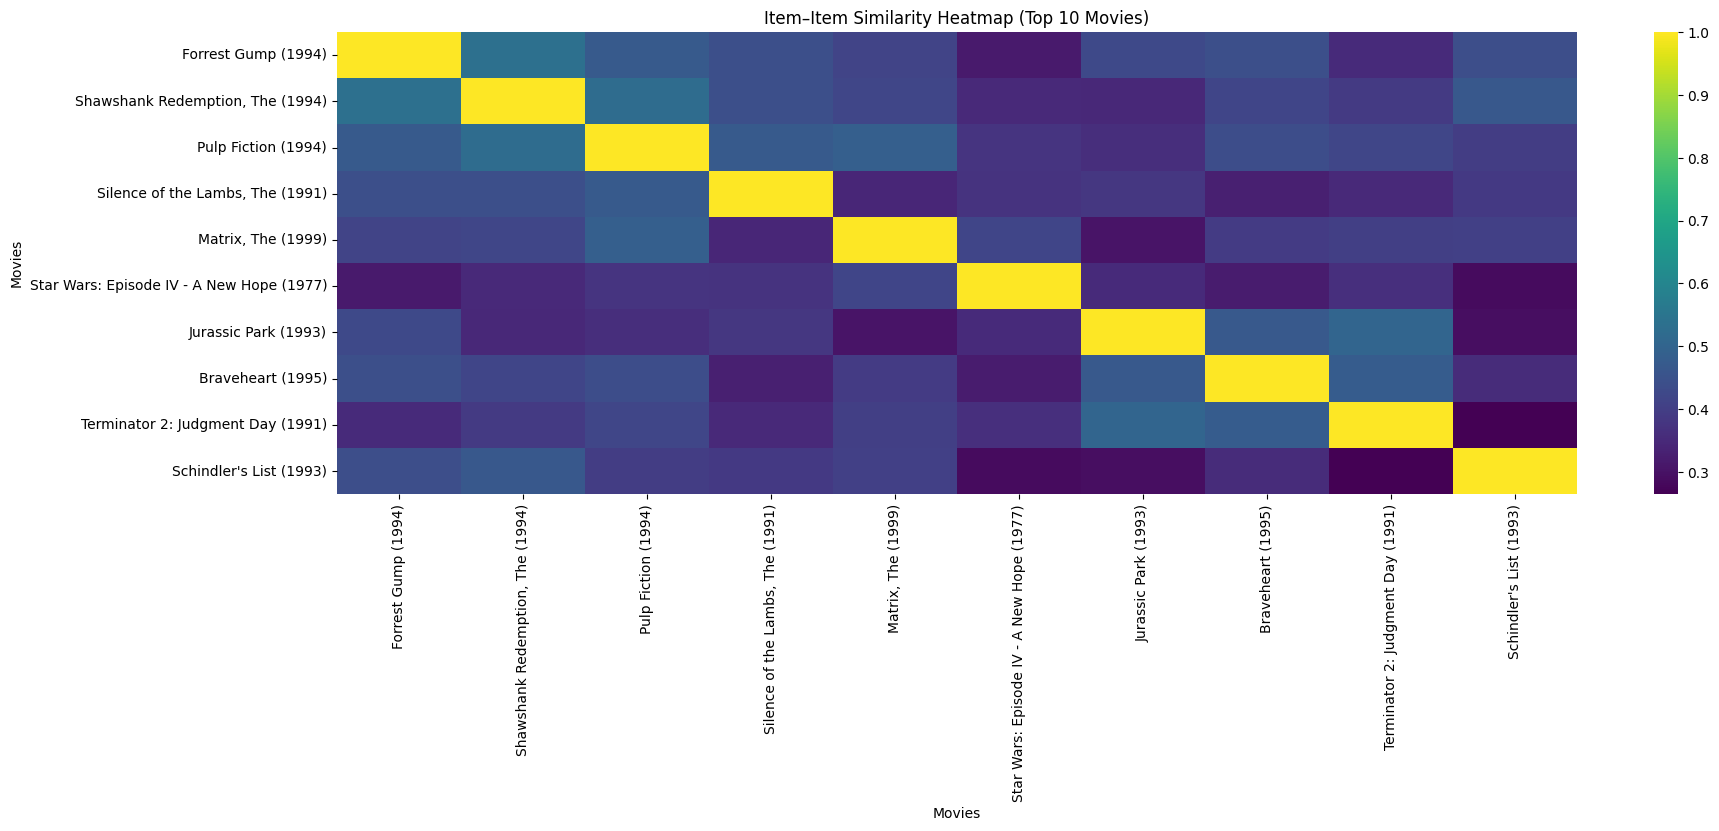

In [71]:
movie_counts = ratingDf.groupby("movieId")["rating"].count()
top_movies = movie_counts.sort_values(ascending=False).head(10).index
sim_subset = item_similarity.loc[top_movies, top_movies]

# movieId → title
titles = dict(zip(movieDf['movieId'], movieDf['title']))
sim_subset_named = sim_subset.rename(index=titles, columns=titles)

plt.figure(figsize=(20, 6))
sns.heatmap(sim_subset_named, cmap="viridis")
plt.title("Item–Item Similarity Heatmap (Top 10 Movies)")
plt.xlabel("Movies")
plt.ylabel("Movies")
plt.show()


##### second model: popularity recommender

In [72]:
popularity = train.groupby("movieId")["rating"].count().sort_values(ascending=False)
popular_movies = popularity.index.tolist()

In [73]:
def popular_recommendations(user_id, top_k=10):
    return popular_movies[:top_k]

In [74]:
def precision_recall_popular(k=10):
    precisions = []
    recalls = []

    test_liked = test[test['liked'] == True]

    for user_id in test_liked['userId'].unique():
        true_items = set(test_liked[test_liked['userId'] == user_id]['movieId'])
        if len(true_items) == 0:
            continue

        recs = popular_recommendations(user_id, top_k=k)
        recs_set = set(recs)

        tp = len(recs_set & true_items)

        precision = tp / k
        recall = tp / len(true_items)

        precisions.append(precision)
        recalls.append(recall)

    return sum(precisions)/len(precisions), sum(recalls)/len(recalls)

p2, r2 = precision_recall_popular(k=10)
print("Popularity Precision@10:", round(p2, 4))
print("Popularity Recall@10:", round(r2, 4))

Popularity Precision@10: 0.0664
Popularity Recall@10: 0.0718


#### Model Comparison

We compare the item–item similarity recommender with a popularity-based baseline.
The popularity model recommends globally most-rated items, while the item–item model uses collaborative filtering based on cosine similarity.
Precision@10 and Recall@10 show that the item–item model performs better than the baseline.